In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
frames = []
for year in range(1970, 2016):
    frames.append(pd.read_json('billboard/data/years/' + str(year) + '.json'))
top_songs = pd.concat(frames, ignore_index=True)
top_songs

,artist,difficult_words,f_k_grade,flesch_index,fog_index,lyrics,num_dupes,num_lines,num_syllables,num_words,pos,sentiment,tags,title,year
0,Simon and Garfunkel,10,0.5,100.24,4.0,When you're weary\nFeeling small\nWhen tears a...,16,32,193.5,160,1,"{'neg': 0.231, 'neu': 0.668, 'pos': 0.101, 'co...","[american, classic pop and rock, contemporary ...",Bridge Over Troubled Water,1970
1,Carpenters,12,0.5,100.24,4.0,Why do birds suddenly appear\nEverytime you ar...,28,35,236.7,203,2,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...","[adult contemporary, baroque pop, classic pop ...",(They Long To Be) Close To You,1970
2,B.J. Thomas,15,1.3,98.21,4.8,Raindrops are falling on my head\nAnd just lik...,11,25,208.8,180,4,"{'neg': 0.088, 'neu': 0.754, 'pos': 0.158, 'co...","[contemporary christian, country, pop, rock, s...",Raindrops Keep Fallin' On My Head,1970
3,Edwin Starr,34,0.9,99.23,4.4,"War, huh, yeah\nWhat is it good for?\nAbsolute...",36,55,430.2,346,5,"{'neg': 0.291, 'neu': 0.489, 'pos': 0.22, 'com...",[classic pop and rock],War,1970
4,Diana Ross,27,-0.3,107.69,4.4,"Ah, ah, ah\nOoh, ooh\nAh, ah, ah\nOoh, ooh\n\n...",28,64,476.1,416,6,"{'neg': 0.045, 'neu': 0.776, 'pos': 0.179, 'co...","[adult contemporary, american, classic pop and...",Ain't No Mountain High Enough,1970
5,Jackson 5,12,0.1,106.67,4.8,You and I must make a pact\nWe must bring salv...,23,38,306.0,273,7,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...","[bubblegum, funk, pop, pop and chart, pop soul...",I'll Be There,1970
6,Rare Earth,16,2.1,96.18,5.6,Never met a girl could make me feel the way th...,5,20,221.4,189,8,"{'neg': 0.02, 'neu': 0.67, 'pos': 0.31, 'compo...","[american, psychedelic rock, psychedelic soul,...",Get Ready,1970
7,Beatles,21,-0.7,108.70,4.0,When I find myself in times of trouble\nMother...,37,52,290.7,268,9,"{'neg': 0.016, 'neu': 0.842, 'pos': 0.14200000...","[1, 60s, 80s, a filk artist, adult alternative...",Let It Be,1970
8,Freda Payne,12,-0.3,107.69,4.4,Now that you're gone\nAll that's left is a ban...,22,34,261.0,232,10,"{'neg': 0.094, 'neu': 0.732, 'pos': 0.17400000...",[classic pop and rock],Band Of Gold,1970
9,Three Dog Night,21,0.5,105.66,5.2,Want some whiskey in your water?\nSugar in you...,21,32,299.7,262,11,"{'neg': 0.047, 'neu': 0.788, 'pos': 0.165, 'co...","[classic pop and rock, never been to spain]",Mama Told Me,1970


In [61]:
words_to_remove = ['you', 'the', 'and', 'i\'m']
# words_to_remove = []

def count_frequencies(lst):
    d = {}
    for word in lst:
        word = word.lower()
        if len(word) > 2:
            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
    return d

lyrics_by_year = pd.DataFrame(top_songs)
lyrics_by_year['lyrics'] = lyrics_by_year['lyrics'].str.replace(r'[^a-zA-Z]', " ").str.split(" ")

In [62]:
lyrics_by_year = lyrics_by_year[['year', 'lyrics']].groupby('year').agg(sum)
lyrics_by_year['lyrics'] = lyrics_by_year['lyrics'].map(count_frequencies)

In [63]:
lyrics_by_year

,lyrics
year,
1970,"{'when': 71, 'you': 585, 'weary': 1, 'feeling'..."
1971,"{'jeremiah': 1, 'was': 27, 'bull': 1, 'frog': ..."
1972,"{'the': 635, 'first': 6, 'time': 37, 'ever': 1..."
1973,"{'well': 41, 'the': 569, 'south': 1, 'side': 9..."
1974,"{'memories': 5, 'light': 5, 'the': 719, 'corne..."
1975,"{'love': 206, 'will': 68, 'keep': 41, 'togethe..."
1976,"{'you': 902, 'think': 15, 'that': 189, 'people..."
1977,"{'stay': 19, 'away': 46, 'from': 26, 'window':..."
1978,"{'you': 939, 'got': 107, 'looking': 15, 'that'..."


In [64]:
def graph_for_word(word):
    data = []
    for year in lyrics_by_year.index:
        lyrics = lyrics_by_year.loc[year]['lyrics']
#         print(lyrics)
        if word in lyrics:
#             print(lyrics[word])
            data.append(lyrics[word])
        else:
            data.append(0)
    plt.plot(lyrics_by_year.index, data)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + r"$\bf{" + word + "}$" + ' in Billboard top 100 songs, 1980 - 2015')
    plt.show()

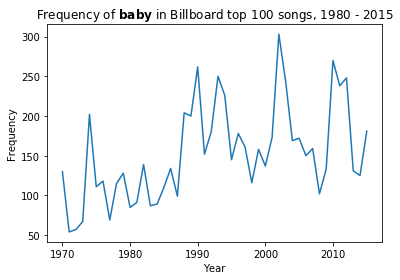

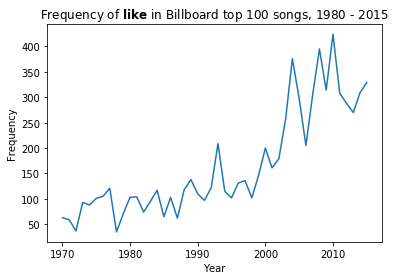

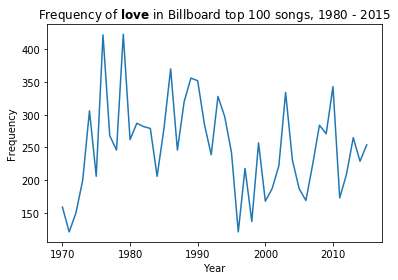

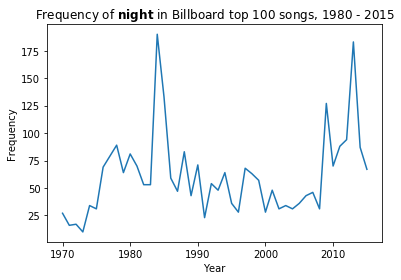

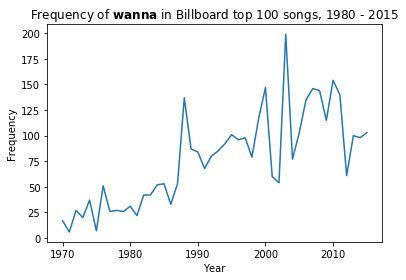

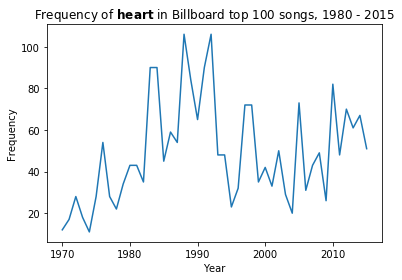

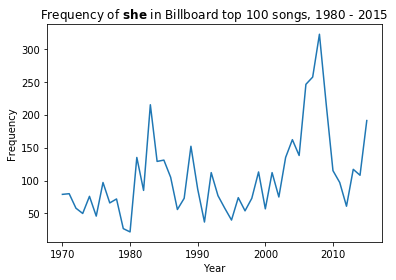

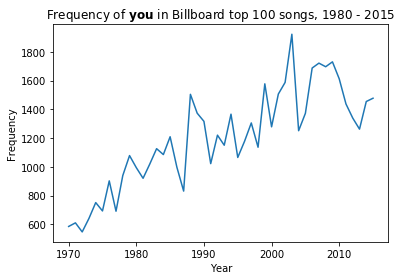

In [65]:
graph_for_word('baby')
graph_for_word('like')
graph_for_word('love')
graph_for_word('night')
graph_for_word('wanna')
graph_for_word('heart')
graph_for_word("she")
graph_for_word("you")

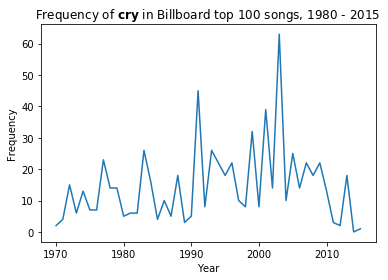

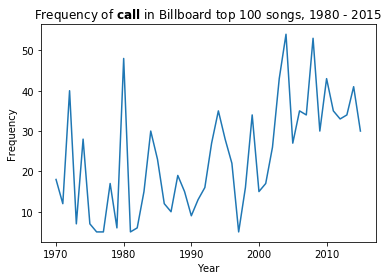

In [69]:
graph_for_word('cry')
graph_for_word('call')

In [9]:
from heapq import nlargest
def getTenHighest(d):
    return nlargest(10, d, key=lambda x: d[x])

it = lyrics_by_year.itertuples()
tenByYear = {}
try:
    while True:
        lyr = next(it)[1]
        print(getTenHighest(lyr))
except StopIteration:
    pass

['you', 'the', 'and', 'love', 'don', 'that', 'your', 'for', 'let', 'all']
['you', 'the', 'and', 'love', 'your', 'don', 'that', 'all', 'for', 'can']
['you', 'the', 'and', 'love', 'your', 'can', 'that', 'get', 'don', 'for']
['you', 'the', 'and', 'love', 'don', 'she', 'that', 'can', 'all', 'know']
['you', 'the', 'and', 'all', 'just', 'can', 'love', 'that', 'your', 'night']
['you', 'the', 'and', 'your', 'love', 'can', 'that', 'for', 'all', 'don']
['you', 'the', 'love', 'and', 'your', 'all', 'that', 'can', 'know', 'don']
['you', 'the', 'and', 'that', 'love', 'don', 'just', 'can', 'for', 'your']
['you', 'the', 'and', 'love', 'your', 'that', 'ooh', 'don', 'can', 'what']
['you', 'the', 'and', 'love', 'your', 'don', 'know', 'that', 'baby', 'can']
['you', 'the', 'and', 'love', 'can', 'that', 'baby', 'know', 'your', 'all']
['you', 'the', 'and', 'love', 'that', 'your', 'can', 'all', 'for', 'baby']
['you', 'the', 'and', 'that', 'love', 'get', 'your', 'can', 'baby', 'for']
['you', 'the', 'and', 'tha

In [10]:
"num_words"

'num_words'

In [11]:
print(top_songs['tags'][0])

['american', 'classic pop and rock', 'disco', 'new wave', 'pop', 'pop reggae', 'pop rock', 'pop/rock', 'power pop', 'punk', 'punk rock', 'rock', 'usa']


In [12]:
top_songs.columns

Index(['artist', 'difficult_words', 'f_k_grade', 'flesch_index', 'fog_index',
       'lyrics', 'num_dupes', 'num_lines', 'num_syllables', 'num_words', 'pos',
       'sentiment', 'tags', 'title', 'year'],
      dtype='object')

In [13]:
top_songs['positivity'] = [d['pos'] for d in top_songs['sentiment']]
top_songs['negativity'] = [d['neg'] for d in top_songs['sentiment']]
top_songs['neutrality'] = [d['neu'] for d in top_songs['sentiment']]
top_songs['difficulty_percentage'] = top_songs['difficult_words'] / top_songs['num_words']
top_songs

,artist,difficult_words,f_k_grade,flesch_index,fog_index,lyrics,num_dupes,num_lines,num_syllables,num_words,pos,sentiment,tags,title,year,positivity,negativity,neutrality,difficulty_percentage
0,Blondie,29,1.7,91.78,4.0,"[Color, me, your, color, , baby, Color, me, yo...",18,39,304.2,229,1,"{'neg': 0.0, 'neu': 0.8270000000000001, 'pos':...","[american, classic pop and rock, disco, new wa...",Call Me,1980,0.173,0.000,0.827,0.126638
1,Olivia Newton-John,15,1.7,91.78,4.0,"[Come, take, my, hand, You, should, know, me, ...",32,41,308.7,244,3,"{'neg': 0.008, 'neu': 0.788, 'pos': 0.20400000...","[australian, british, classic pop and rock]",Magic,1980,0.204,0.008,0.788,0.061475
2,Michael Jackson,9,-0.7,108.70,4.0,"[Girl, , close, your, eyes, Let, that, rhythm,...",21,44,290.7,254,4,"{'neg': 0.022, 'neu': 0.853, 'pos': 0.124, 'co...","[american, américain, chanteur, classic pop an...",Rock With You,1980,0.124,0.022,0.853,0.035433
3,Captain and Tennille,3,2.5,89.75,4.8,"[Do, that, to, me, one, more, time, Once, is, ...",22,26,254.7,200,5,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",[american],Do That To Me One More Time,1980,0.112,0.000,0.888,0.015000
4,Paul McCartney,16,1.7,91.78,4.0,"[You, want, a, love, to, last, forever, One, t...",26,34,261.0,198,7,"{'neg': 0.012, 'neu': 0.7010000000000001, 'pos...","[00s, 60s, 70s, 80s, 90s, british, classic pop...",Coming Up,1980,0.286,0.012,0.701,0.080808
5,"Lipps, Inc.",12,1.7,91.78,4.0,"[Gotta, make, a, move, to, a, town, that, s, r...",49,50,390.6,296,8,"{'neg': 0.0, 'neu': 0.968, 'pos': 0.032, 'comp...","[70s, classic pop and rock, disco, female voca...",Funkytown,1980,0.032,0.000,0.968,0.040541
6,Billy Joel,37,1.7,97.20,5.2,"[What, s, the, matter, with, the, clothes, I, ...",13,39,385.2,319,9,"{'neg': 0.019, 'neu': 0.86, 'pos': 0.121, 'com...","[american, classic pop and rock, classical, pi...",It's Still Rock And Roll To Me,1980,0.121,0.019,0.860,0.115987
7,Gary Numan,7,0.5,100.24,4.0,"[Here, in, my, car, I, feel, safest, of, all, ...",7,16,98.1,84,12,"{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp...","[british, classic pop and rock, dark wave, ele...",Cars,1980,0.088,0.000,0.912,0.083333
8,Smokey Robinson,19,2.5,89.75,4.8,"[Baby, let, s, cruise, away, from, here, Don, ...",20,38,359.1,280,13,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.2860000000...","[american, classic pop and rock, motown, rnb, ...",Cruisin',1980,0.286,0.000,0.714,0.067857
9,Air Supply,13,0.9,104.64,5.6,"[I, realize, the, best, part, of, love, is, th...",28,36,391.5,353,15,"{'neg': 0.082, 'neu': 0.644, 'pos': 0.273, 'co...","[adult contemporary, australian, pop, pop rock...",Lost In Love,1980,0.273,0.082,0.644,0.036827


In [14]:
averages = top_songs.groupby('year').mean()

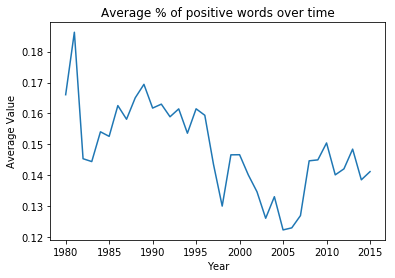

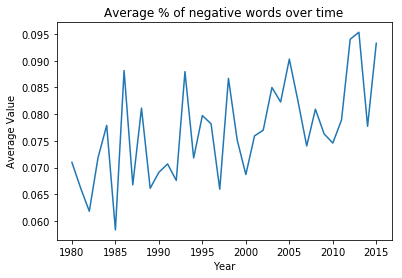

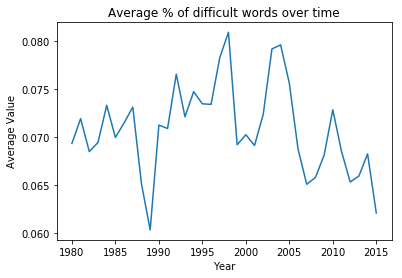

In [15]:
def plot_average_for_column(column, title):
    plt.plot(averages.index, averages[column])
    plt.xlabel('Year')
    plt.ylabel('Average Value')
    plt.title(title)
    plt.show()

plot_average_for_column('positivity', 'Average % of positive words over time')
plot_average_for_column('negativity', 'Average % of negative words over time')
plot_average_for_column('difficulty_percentage', 'Average % of difficult words over time')

In [16]:
top_songs['hip_hop'] = [('hip hop' in tags) for tags in top_songs['tags']]

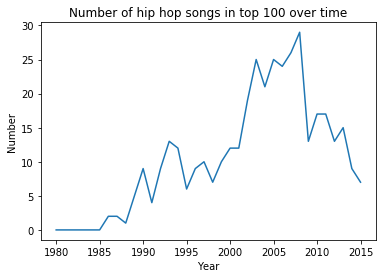

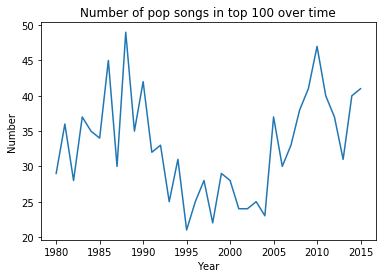

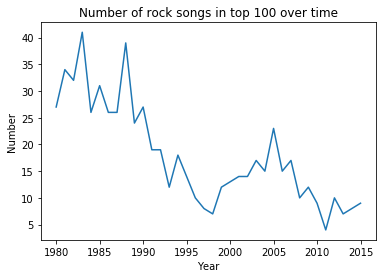

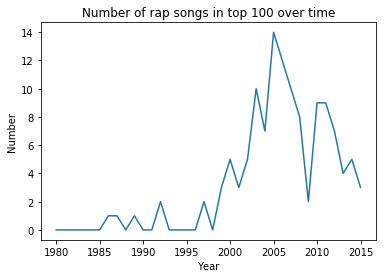

In [17]:
def plot_by_genre(genre, genre_name):
    top_songs[genre] = [(genre_name in tags) for tags in top_songs['tags']]
    counted = top_songs.groupby('year').sum()
    plt.plot(counted.index, counted[genre])
    plt.xlabel('Year')
    plt.ylabel('Number')
    plt.title('Number of ' + genre_name + ' songs in top 100 over time')
    plt.show()
    
plot_by_genre('hip_hop', 'hip hop')
plot_by_genre('pop', 'pop')
plot_by_genre('rock', 'rock')
plot_by_genre('rap', 'rap')

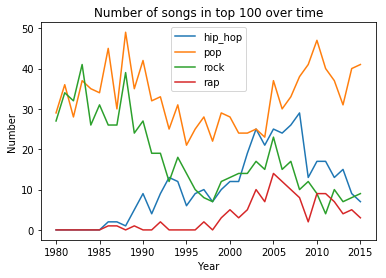

In [18]:
def plot_by_genre(genre, genre_name):
    top_songs[genre] = [(genre_name in tags) for tags in top_songs['tags']]
    counted = top_songs.groupby('year').sum()
    plt.plot(counted.index, counted[genre])
    
plot_by_genre('hip_hop', 'hip hop')
plot_by_genre('pop', 'pop')
plot_by_genre('rock', 'rock')
plot_by_genre('rap', 'rap')
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Number of songs in top 100 over time')
plt.legend()

plt.show()